<a href="https://colab.research.google.com/github/juancuevas-ops/inteligencia-artificial/blob/main/Keras_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install tensorflow
import tensorflow as tf
!pip install matplotlib-venn
import numpy as np   
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
#from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 3s 0us/step


In [9]:
y_train_original 

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [10]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

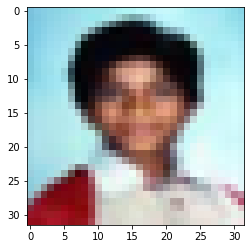

In [11]:
imgplot = plt.imshow(x_train_original[3])
plt.show()

In [12]:
x_train = x_train_original/255  
x_test = x_test_original/255 

In [13]:
K.set_image_data_format('channels_last')  

In [14]:
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [15]:
def create_simple_nn():  
  model = Sequential()
  model.add(Flatten(input_shape=(32, 32, 3), name="Input_layer"))
  model.add(Dense(1000, activation='relu', name="Hidden_layer_1"))
  model.add(Dense(500, activation='relu', name="Hidden_layer_2"))
  model.add(Dense(100, activation='softmax', name="Output_layer"))

  return model

In [16]:
snn_model = create_simple_nn()  
snn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse']) 

In [17]:
snn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 3072)              0         
                                                                 
 Hidden_layer_1 (Dense)      (None, 1000)              3073000   
                                                                 
 Hidden_layer_2 (Dense)      (None, 500)               500500    
                                                                 
 Output_layer (Dense)        (None, 100)               50100     
                                                                 
Total params: 3,623,600
Trainable params: 3,623,600
Non-trainable params: 0
_________________________________________________________________


In [18]:
snn = snn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)  

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 4.1818 - acc: 0.0728 - mse: 0.0097 - val_loss: 3.9535 - val_acc: 0.0945 - val_mse: 0.0096
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 3.7924 - acc: 0.1308 - mse: 0.0095 - val_loss: 3.7693 - val_acc: 0.1266 - val_mse: 0.0094
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 3.6323 - acc: 0.1589 - mse: 0.0093 - val_loss: 3.6221 - val_acc: 0.1620 - val_mse: 0.0093
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 3.5282 - acc: 0.1772 - mse: 0.0092 - val_loss: 3.5940 - val_acc: 0.1686 - val_mse: 0.0093
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 3.4443 - acc: 0.1919 - mse: 0.0091 - val_loss: 3.5445 - val_acc: 0.1751 - val_mse: 0.0092
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 3.3707 - acc: 0.2054 - mse: 0.0090 - val_loss: 3.4856 - val_acc: 0.1829 - val_mse:

In [19]:
evaluation = snn_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)  
evaluation

313/313 [==============================] - 3s 10ms/step - loss: 3.3110 - acc: 0.2252 - mse: 0.0089


[3.310992479324341, 0.22519999742507935, 0.008905278518795967]

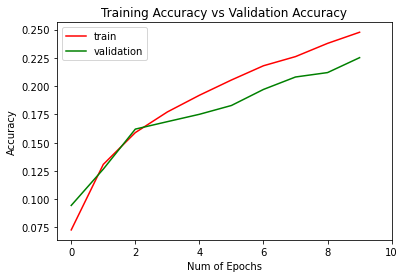

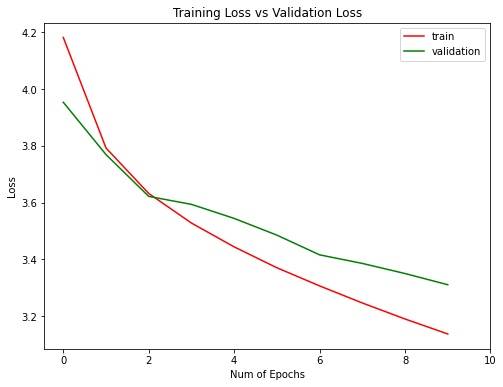

In [20]:
plt.figure(0)  
plt.plot(snn.history['acc'],'r')  
plt.plot(snn.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(snn.history['loss'],'r')  
plt.plot(snn.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  